In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Use Random forest Regression on Housing dataset

In [2]:
housing = pd.read_csv("E:\Practical Machine Learning\Day 3\homeprices.csv")
housing

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,3800,725000
5,4000,770000
6,4500,850000
7,5000,920000
8,5500,980000
9,2400,510000


In [18]:
x=housing.iloc[:,:-1].values
y=housing.iloc[:,-1].values

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
regressor.predict([[3100]])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([574000.])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


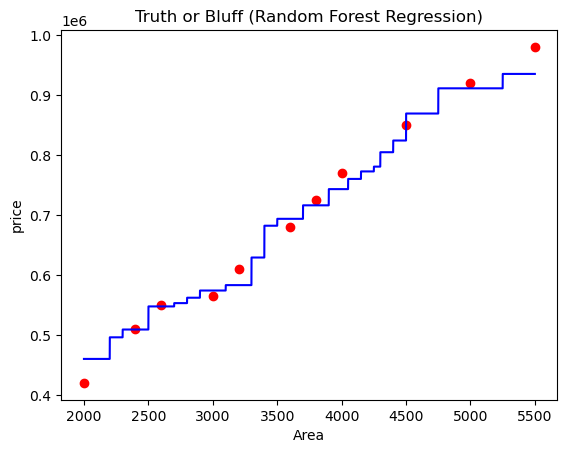

In [23]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Area')
plt.ylabel('price')
plt.show()

## Use Random Forest Regression on Hiring Dataset

In [42]:
hiring = pd.read_csv(r"E:\Practical Machine Learning\Day 3\hiring.csv")
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [43]:
x=hiring.iloc[:,:-1]
y=hiring.iloc[:,-1]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
g=x.iloc[:,1].values
x.iloc[:,1] = imputer.fit_transform(g.reshape(-1,1))

In [45]:
imputer = SimpleImputer(missing_values=np.nan , strategy='constant', fill_value= 'one')
gg= x.iloc[:,0].values
x.iloc[:,0] = imputer.fit_transform(gg.reshape(-1,1))
x                                                                     

,experience,test_score(out of 10),interview_score(out of 10)
0,one,8.000000,9
1,one,8.000000,6
2,five,6.000000,7
3,two,10.000000,10
4,seven,9.000000,6
5,three,7.000000,10
6,ten,7.857143,7
7,eleven,7.000000,8


In [46]:
from sklearn.preprocessing import  OrdinalEncoder
oe= OrdinalEncoder (categories=[['one','two','three','five','seven','ten','eleven']])
data_ord = x.iloc[:,0:1]
model=oe.fit_transform(data_ord)

In [47]:
x['experience']=model
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.000000,9
1,0.0,8.000000,6
2,3.0,6.000000,7
3,1.0,10.000000,10
4,4.0,9.000000,6
5,2.0,7.000000,10
6,5.0,7.857143,7
7,6.0,7.000000,8


In [48]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
regressor.predict([[9,9,9]])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([74900.])

In [50]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000
